Statistics of Description Dataset
==================

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as pltColors
import numpy as np
import csv
from collections import Counter, defaultdict

In [2]:
# Load files
inputFile = 'data/cat_desc.csv'
headers = None
data = Counter()
with open(inputFile) as fin:
    r = csv.reader(fin)
    for row in r:
        if headers is None:
            headers = row
            print headers
        else:
            data[tuple(row[:-1])] += int(row[-1])

catNameFile = 'data/categoryKey.csv'
catName = {}
with open(catNameFile) as fin:
    r = csv.reader(fin)
    for row in r:
        catName[row[0]] = row[1]

['category_id', 'description', 'count']


In [3]:
# Count various frequencys
wordList = []
descOccur = Counter()
descCat = Counter()
catOccur = Counter()
catUniqueWord = Counter()
for (c, d), v in data.iteritems():
    wordList.append(d)
    descOccur[d]+=v
    descCat[d] += 1
    catOccur[c] += v
    catUniqueWord[c] += 1
print 'Number of valid answers:', sum(catOccur.values())
print 'Number of distinct descriptions:', len(wordList)
print 'Number of categories:', len(catOccur.keys())

Number of valid answers: 5116436
Number of distinct descriptions: 477354
Number of categories: 1055


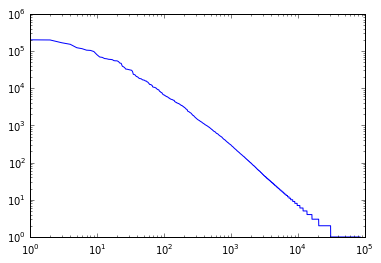

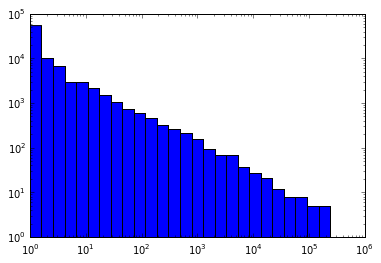

In [4]:
# log rank - log #occurance, for distinct descriptions
pltData = [v for k, v in descOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# histogram of log #occurance, for distinct descriptions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, bins=np.logspace(0.0, 6.0, 30))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

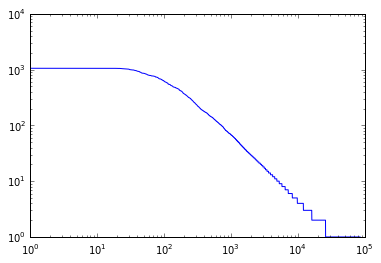

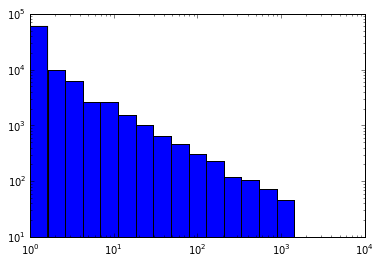

bridge 1055
garden 1055
hall 1055
road 1055
house 1055
church 1055
play ground 1055
shop 1055
forest 1055
bedroom 1055
office 1055
building 1055
mountain 1055
factory 1055
sea 1054
ground 1054
river 1053
restaurant 1052
fort 1052
tree 1051
room 1048
park 1048
hotel 1048
palace 1041
home 1037
water 1034
car 1030
people 1026
stadium 1021
living room 1016


In [5]:
# log rank - log #category, for distinct descriptions
pltData = [v for k, v in descCat.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# histogram of log #category, for distinct descriptions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, bins=np.logspace(0.0, 4.0, 20))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

for w, c in descCat.most_common(30):
    print w, c

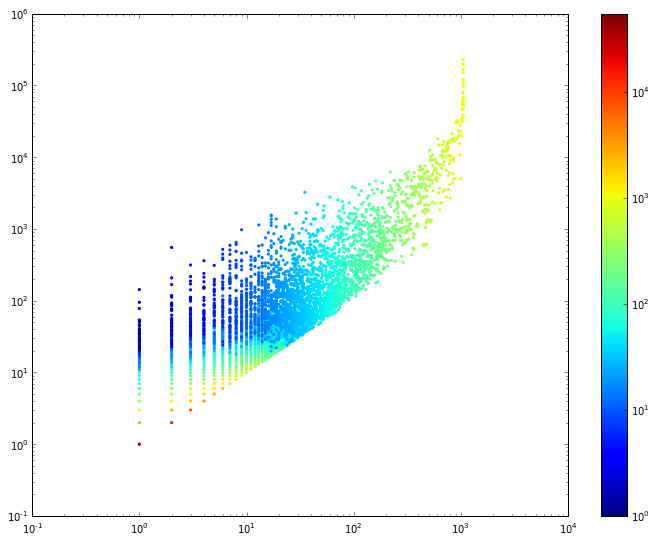

In [6]:
# log #category - log #occurance - (color) log frequency, for distinct descriptions
pltData1 = [descCat[w] for w in wordList]
pltData2 = [descOccur[w] for w in wordList]
pltDensity = Counter(zip(pltData1, pltData2))
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
# pltColor = np.log10(pltColor)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='', norm=pltColors.LogNorm())
cbar = fig.colorbar(scat, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

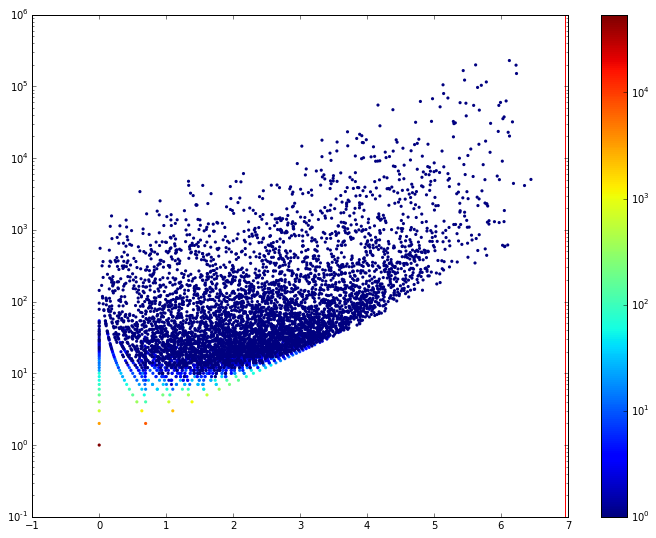

Theoretical upper bound: 6.96129604591
Most diverse descriptions: (description, entropy, #occuranceP)
mountion 6.44772669475 5041
place 6.35168401771 4144
hall 6.23209932095 150938
building 6.22521271087 197376
men 6.18663674473 4435
people 6.17166355614 31956
wall 6.12742942097 20273
house 6.12548872063 228983
company 6.10748643267 22878
laser show 6.1011483597 615
room 6.07707765193 62542
body art 6.05968463481 592
shop board 6.0542162433 583
person 6.05039606164 1857
tree 6.0469312839 37494
outside 6.04588046055 1302
home 6.02867229753 35389
diagnostic lab 6.02384684614 609
man 6.01991134841 9062
ground 5.99307607498 59648


In [7]:
# entropy of category distribution - log #occurance, for each description
desc_cat_cnt = defaultdict(Counter)
for (cat, desc), cnt in data.iteritems():
    desc_cat_cnt[desc][cat]+=cnt
pltData = []
topEntropy = []
from scipy.stats import entropy
from sklearn.preprocessing import normalize
for desc, cntr in desc_cat_cnt.iteritems():
    occ = sum(cntr.values())
    dist = np.array(cntr.values(), dtype='float') / occ
    ent = entropy(dist)
    pltData.append((ent, occ))
    topEntropy.append((ent, desc, occ))
pltDensity = Counter(pltData)
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
# pltColor = np.log10(pltColor)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='', norm=pltColors.LogNorm())
cbar = fig.colorbar(scat, ax=ax)
ax.set_yscale('log')
ax.axvline(x=np.log(len(catOccur.keys())), color='r')
plt.show()

print 'Theoretical upper bound:', np.log(len(catOccur.keys()))
print 'Most diverse descriptions: (description, entropy, #occuranceP)'
topEntropy.sort(key=lambda (e, d, o): e, reverse=True)
for e, d, o in topEntropy[:20]:
    print d, e, o

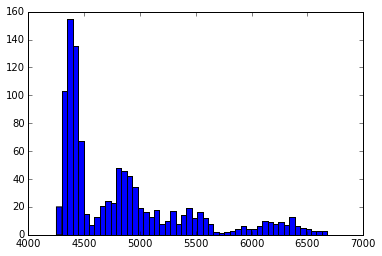

In [8]:
# histogram of #occurance, for each category
pltData = [v for k, v in catOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, 50)
plt.show()

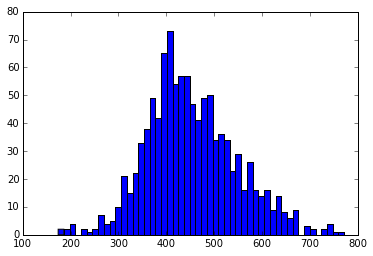

In [9]:
# histogram of #(unique descriptions), for each category
pltData = [v for k, v in catUniqueWord.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, 50)
plt.show()

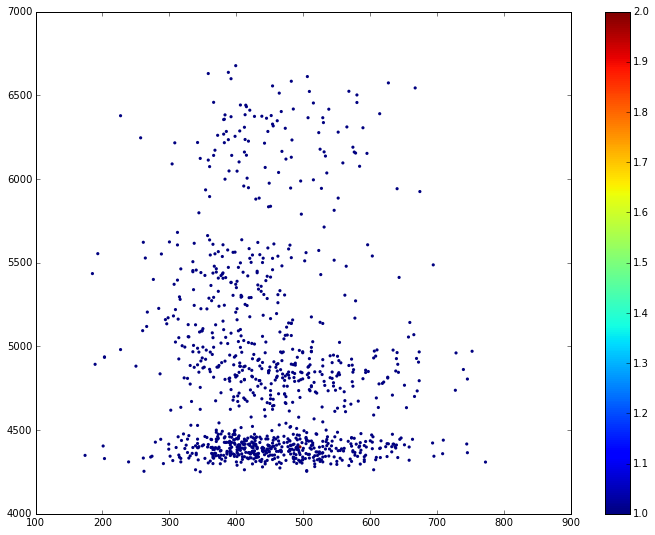

In [10]:
# #(unique descriptions) - #occurance - (color) log frequency, for each category
catList = list(catOccur.keys())
pltData1 = [catUniqueWord[c] for c in catList]
pltData2 = [catOccur[c] for c in catList]
pltDensity = Counter(zip(pltData1, pltData2))
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='')
cbar = fig.colorbar(scat, ax=ax)
plt.show()

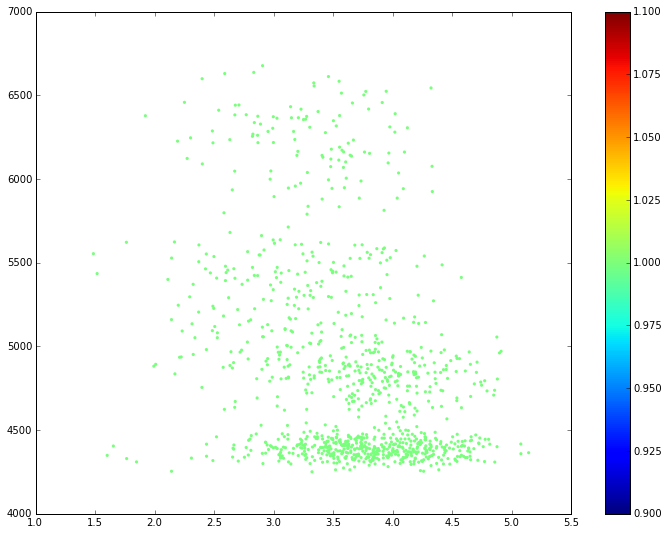

Least diverse categories: (name, id, entropy, #occurance)
hotel room 478 1.48629645209 5554
motel room 617 1.51752887878 5435
suvic 920 1.6022681808 4349
master bedroom 588 1.65390246521 4405
forest 390 1.76349121613 5622
guest room 436 1.76545397687 4330
bed sitting room 103 1.84839957022 4310
cataract 191 1.92301015772 6378
woodland 1045 1.99397549241 4882
waterfall (cataract) 1028 2.00962620112 4893

Most diverse categories: (name, id, entropy, #occurance)
backstage 61 4.85663538381 4738
booth 129 4.85804635452 4309
archaological excavation 38 4.87534678034 5056
skating rink 855 4.87691528081 4401
community center 245 4.87990775561 4805
agriculture 7 4.89777883204 4961
africa 5 4.91115381691 4971
outdoor 668 5.0768184175 4417
rubble 810 5.07751403448 4359
borstal 130 5.14244656514 4365


In [11]:
# entropy of description distribution - log #occurance, for each category
cat_desc_cnt = defaultdict(Counter)
for (cat, desc), cnt in data.iteritems():
    cat_desc_cnt[cat][desc]+=cnt
pltData = []
topEntropy = []
from scipy.stats import entropy
from sklearn.preprocessing import normalize
for cat, cntr in cat_desc_cnt.iteritems():
    occ = sum(cntr.values())
    dist = np.array(cntr.values(), dtype='float') / occ
    ent = entropy(dist)
    pltData.append((ent, occ))
    topEntropy.append((ent, cat, occ))
pltDensity = Counter(pltData)
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='')
cbar = fig.colorbar(scat, ax=ax)
plt.show()

topEntropy.sort(key=lambda (e, c, o): e)
print 'Least diverse categories: (name, id, entropy, #occurance)'
for e, c, o in topEntropy[:10]:
    print catName[c], c, e, o
print
print 'Most diverse categories: (name, id, entropy, #occurance)'
for e, c, o in topEntropy[-10:]:
    print catName[c], c, e, o